Accuracy: 0.5789
Mean Squared Error (MSE): 0.4211
Mean Absolute Error (MAE): 0.4211

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.42      0.44        53
           1       0.64      0.69      0.66        80

    accuracy                           0.58       133
   macro avg       0.55      0.55      0.55       133
weighted avg       0.57      0.58      0.57       133



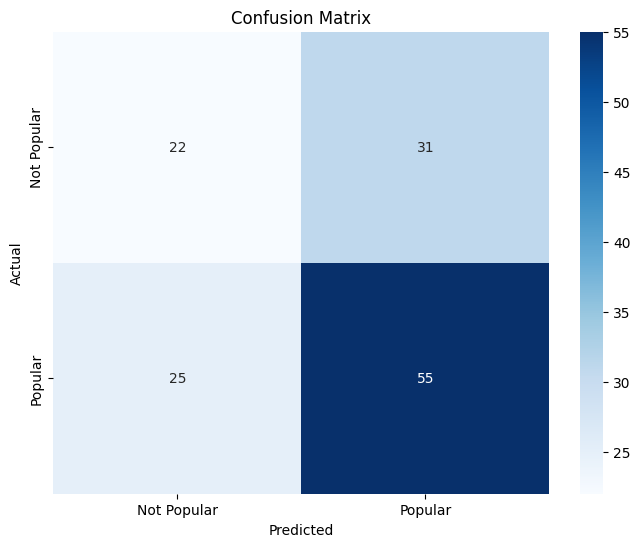

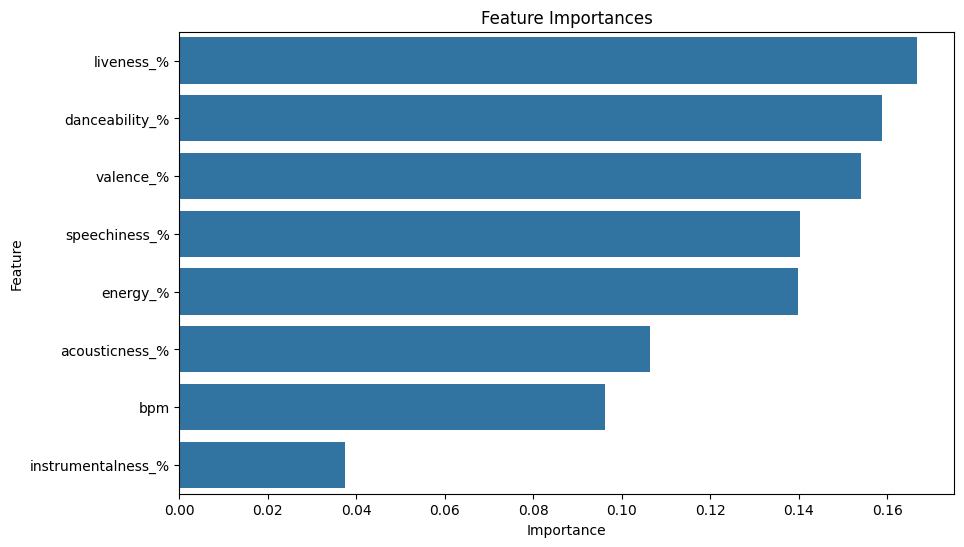

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("final_data.csv")

# Define the threshold for popularity
POPULARITY_THRESHOLD = 70
df["is_popular"] = (df["Spotify Popularity"] >= POPULARITY_THRESHOLD).astype(int)

# Select features for the model
audio_features = [
    "danceability_%", "valence_%", "energy_%", "acousticness_%",
    "instrumentalness_%", "liveness_%", "speechiness_%", "bpm"
]

features = audio_features
target = "is_popular"

# Drop rows with missing values in the selected features
df_model = df[features + [target]].dropna()

# Split the dataset into training and testing sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}\n")
print("Classification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importance plot
feature_importances = model.feature_importances_
features_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
features_df = features_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=features_df)
plt.title("Feature Importances")
plt.show()